# Canny Edge Detection
anny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

    1. Noise Reduction
    Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter.
    2 . Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). From these two images, we can find edge gradient and direction for each pixel as follows:
    
Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

    3. Non-maximum Suppression
    After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:

Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with “thin edges”.

    4 . Hysteresis Thresholding
    
    This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 
    
 # Canny Edge Detection in OpenCV.
 OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge\_Gradient \; (G) = |G_x| + |G_y|. By default, it is False.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def displayImage(imageList,cmap=None):
    plt.figure(figsize=(18,12))
    i = 0
    for item in imageList:  
        plt.subplot(2, 5, i+1)
        plt.imshow(item['image'],cmap)
        i += 1
        plt.axis('off')
        plt.title(item['name'],fontsize = 18, color = 'green')
    plt.tight_layout()
    plt.show()
    

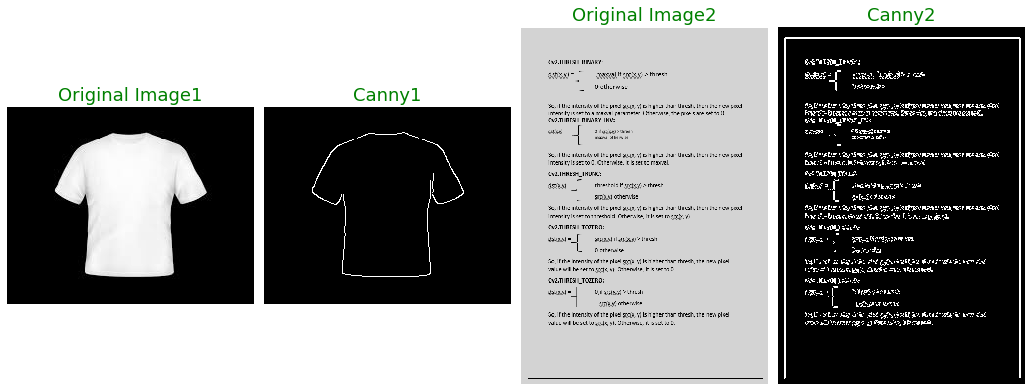

In [16]:
img = cv2.imread('images/black-white.jpg',0) 
img2 = cv2.imread('images/formula-with -border.png',0) 
edges = cv2.Canny(img,100,200)
edges2 = cv2.Canny(img2,100,200)

displayImage([
        {'name':'Original Image1','image':img},
        {'name':'Canny1','image':edges},
        {'name':'Original Image2','image':img2},
        {'name':'Canny2','image':edges2},
        ],'gray')